In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Existing Synthetic Network</h1>
<h2 style="text-align: center;">network-only Bayes classifier (nBC) as relational model</h2>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "BAH"                       # network generative model type
sampling = "nodes"                 # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.3                       # fraction of nodes to sample 
LC = "prior"                       # local model
RC = "nBC"                         # relational model
CI = "relaxation"                  # inference
N = 500                            # Number of nodes: 500, 2000
m = 4                              # minimum degree: 4, 20
B = 0.3                            # minority fraction: 0.1, 0.3, 0.5
H = 0.9                            # Homophily: 0.0, 0.1, 0.2, ..., 1.0
epoch = 1                          # x out of 5 
DATAPATH = "../data/"              # networkx graph files path
OUTPUT = "../results-individual"   # directory to store results

<h2>1. Network</h2>

In [4]:
net = Network()
net.load(io.get_random_datafn(DATAPATH,kind,N,m,B,H))
net.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 500
Number of edges: 1984
Average degree:   7.9360
{'fullname': 'BAH-N500-m4-B0.3-H0.9-i4-x5-h0.9-k7.9-km7.4-kM8.2', 'i': '4', 'group': ['M', 'm'], 'b': 0.3, 'm': '4', 'name': 'homophilic_barabasi_albert', 'kM': 8.154285714285715, 'km': 7.426666666666667, 'labels': ['blue', 'red'], 'class': 'color', 'density': 0.01590380761523046, 'H': None, 'B': '0.3', 'n': 500, 'min_degree': 3, 'attributes': ['color'], 'h': 0.9, 'N': '500', 'k': 7.936, 'kind': None, 'Hmm': None, 'HMM': None, 'e': 1984, 'x': '5'}


<h2>2. Sampling</h2>

In [5]:
sam = Sampling(sampling, net.G, pseeds, epoch)
sam.extract_subgraph()
sam.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 150
Number of edges: 165
Average degree:   2.2000
{'fullname': 'BAH-N500-m4-B0.3-H0.9-i4-x5-h0.9-k7.9-km7.4-kM8.2', 'i': '4', 'group': ['M', 'm'], 'N': 150, 'name': 'homophilic_barabasi_albert', 'Hmm': None, 'kM': 2.234234234234234, 'km': 2.1025641025641026, 'labels': ['blue', 'red'], 'pseeds': 0.3, 'density': 0.01476510067114094, 'H': 3.6435334744346632, 'B': 0.26, 'epoch': 1, 'class': 'color', 'attributes': ['color'], 'h': 0.9, 'method': 'nodes', 'k': 2.2, 'kind': None, 'm': 0, 'HMM': None, 'e': 165, 'x': '5'}


<h2>3. Modeling</h2>

In [6]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

blue    0.736842
red     0.263158
dtype: float64


In [7]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          blue       red
blue  0.932000  0.068000
red   0.202381  0.797619


<h2>4. Inference</h2>

In [8]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(2.031687428917419e-10, 2.1204079951156668e-07, 2.476655818576508e-40, 1.5944421643134454e-33, 8.767206625946853e-19)

Prediction in 243.0064136981964 seconds
ROCAUC: 0.9991895661351728
ROCAUC curve: 0.9991895661351728
MAE: 0.008571428571428572
ccm: 0.990990990990991
ccM: 0.9916317991631799
bias: 0.4998383938247429

BAH-N500-m4-B0.3-H0.9-i4-x5-h0.9-k7.9-km7.4-kM8.2_nodes creating...
BAH-N500-m4-B0.3-H0.9-i4-x5-h0.9-k7.9-km7.4-kM8.2_nodes created!
BAH-N500-m4-B0.3-H0.9-i4-x5-h0.9-k7.9-km7.4-kM8.2_nodes/P30_graph.gpickle saved!
BAH-N500-m4-B0.3-H0.9-i4-x5-h0.9-k7.9-km7.4-kM8.2_nodes/P30_samplegraph.gpickle saved!
BAH-N500-m4-B0.3-H0.9-i4-x5-h0.9-k7.9-km7.4-kM8.2_nodes/P30_evaluation.pickle saved!


<h2>5. Results</h2>

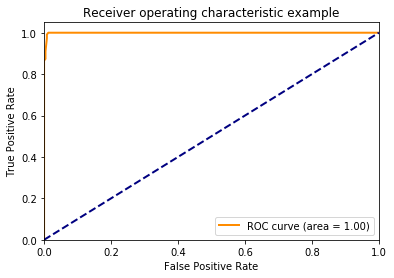

In [9]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)